In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Datasets',
 'Dipin_0102_Simple_Linear_Regression.ipynb',
 'Dipin_Medical Insurance.ipynb',
 'Fuel_Consumption.ipynb',
 'House_Price_Prediction.ipynb',
 'Notes_02_Visuals.ipynb',
 'Patient Expense Prediction Analysis for Doctors.ipynb',
 'Patient-Analysis-Expenses.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [3]:
os.listdir('Datasets')

['FuelConsumption.csv',
 'House_Price_Prediction.csv',
 'Insurance.csv',
 'Patients_Data.csv']

In [4]:
data=pd.read_csv('Datasets//Patients_Data.csv')

In [5]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [6]:
data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

**We can see the std deviation for all these data columns are not in acceptable range, Other than 'children column', which is somewhat insignificant** 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


Ok, So lets work on feature engineering part, We have 3 Non number columns, Lets make it number using LabelEncoder() 

In [8]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()


In [9]:
data.sex=label.fit_transform(data.sex)
data.smoker=label.fit_transform(data.smoker)
data.region=label.fit_transform(data.region)

In [10]:
data.describe()

age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      1.515695  13270.422265  
std       1.104885  12110.011237  
min       0.000000   1121.873900  
25%       1.000000   4740.287150  
50%       2.000000   9382.033000  
75%       2.000000  16639.912515  
max       3.000000  63770.428010

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int32
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int32
region      1338 non-null int32
charges     1338 non-null float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


So, All values are converted to Numbers, Now we can check for any duplicate values

In [12]:
data.isnull().sum()/len(data)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

Ok. so data is clear !!!

**Now, as we can see the STD value is not acceptable for many cases, Lets work on std deviation part**

In [13]:
data.charges.std()

12110.011236694001

In [14]:
data.charges.mean()

13270.422265141257

Lets plot the dist plot to find out the standard deviation for dataset 

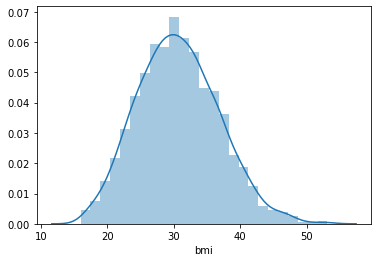

In [15]:
sns.distplot(data.bmi)

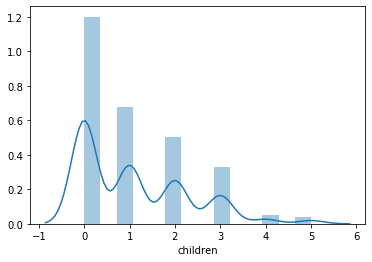

In [16]:
sns.distplot(data.children)

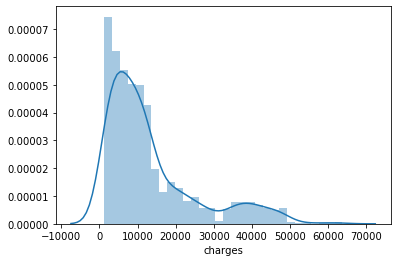

In [17]:
sns.distplot(data.charges)

Lets check the data correlation using heatmap

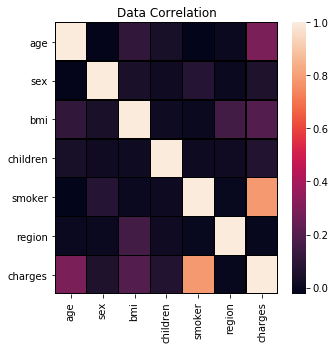

In [18]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),linewidth=0.5, linecolor='Black')
plt.title('Data Correlation')
plt.show()

**Logarithm for normalisation of Output value**
We can take the log of ouput value to reduce the deviation value to work on it, Log is generally making the size of dataset less but keeping the distribution same. At the end, we will be converting log back to exponential. 

In [19]:
y=np.log(data.charges)

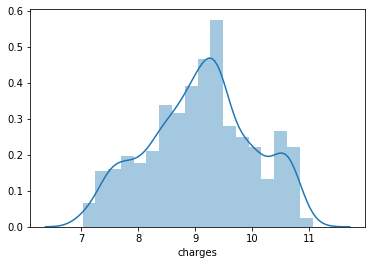

In [20]:
sns.distplot(y)

Output value y seems in bell curve now, Lets work on input values 

In [21]:
x=data.drop('charges', axis=1)

In [22]:
x.describe()

age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region  
count  1338.000000  
mean      1.515695  
std       1.104885  
min       0.000000  
25%       1.000000  
50%       2.000000  
75%       2.000000  
max       3.000000

**Now lets describe the relationship between X and Y by Linear regression Model**

In [24]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(x,y)
result=regr.predict(x)
regr.score(x,y)

0.7669959067574671

**As per our model, the linear regression score is 0.7669959067574671, which is not in acceptable range, We need to work on feature engineering part to make the score near to 1**  

*lets work on outliers and inliers to reduce the std deviation, to find these points, we will use box plots*

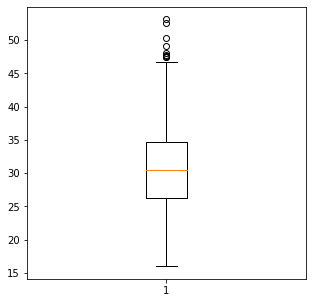

In [25]:
plt.figure(figsize=(5,5))  # bmi Box plot 
plt.boxplot(x.bmi)
plt.show()

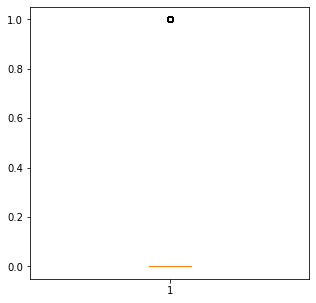

In [26]:
plt.figure(figsize=(5,5))  # Smoker Box plot
plt.boxplot(data.smoker)
plt.show()

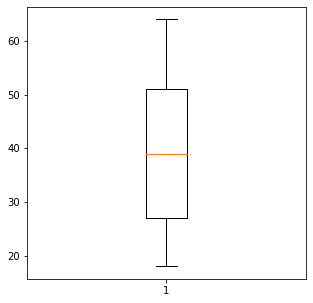

In [27]:
plt.figure(figsize=(5,5)) # Age box plot
plt.boxplot(data.age)
plt.show()

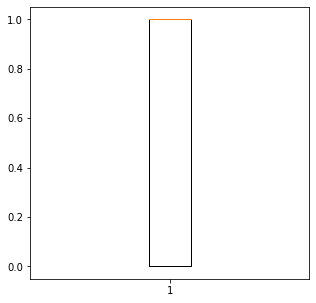

In [28]:
plt.figure(figsize=(5,5)) # Sex box plot
plt.boxplot(data.sex)
plt.show()

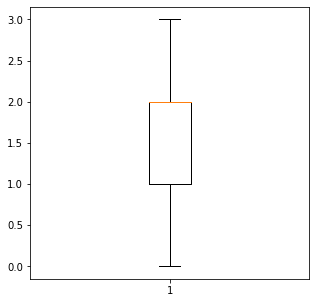

In [33]:
plt.figure(figsize=(5,5)) # region box plot
plt.boxplot(data.region)
plt.show()


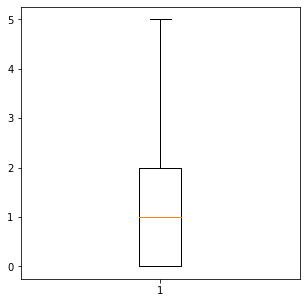

In [34]:
plt.figure(figsize=(5,5)) # children box plot
plt.boxplot(data.children)
plt.show()

**As per the above box plot anaysis, we can see only bmi data is having outliers and we need to rectify that !!**.Lets analysis the Box plot of bmi again

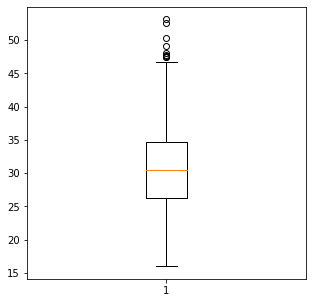

In [38]:
plt.figure(figsize=(5,5))  # bmi Box plot 
plt.boxplot(x.bmi)
plt.show()

We can omit the values above our upper limit as outliners after muitilplying with a factor. 

In [39]:
new_bmi=x.bmi.values

In [40]:
new_bmi

array([27.9 , 33.77, 33.  , ..., 36.85, 25.8 , 29.07])